In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

# Analysis of 3D-DSGs: Object Graph

In [2]:
data_files = ['data/mp3d_object_analysis_complete.pkl',
              'data/mp3d_object_analysis_trajectory.pkl']

labels = ['complete', 'trajectory']

data_ = []
length = dict()
for file_, label_ in zip(data_files, labels):
    
    with open(file_, 'rb') as f:
        d = pickle.load(f)
        length[label_] = len(d['num_nodes'])
        data_.append(d)

In [3]:
data = dict() 

data['type'] = []
for key in data_[0].keys():
    data[key] = []

for i in [0, 1]:
    for key in data_[0].keys():
        data[key] = [*data[key], *data_[i][key]]
        len_ = len(data_[i][key])
    for j in range(len_):
        data['type'].append(labels[i])

In [4]:
df = pd.DataFrame.from_dict(data)

## Number of Nodes

<AxesSubplot: xlabel='num_nodes', ylabel='Density'>

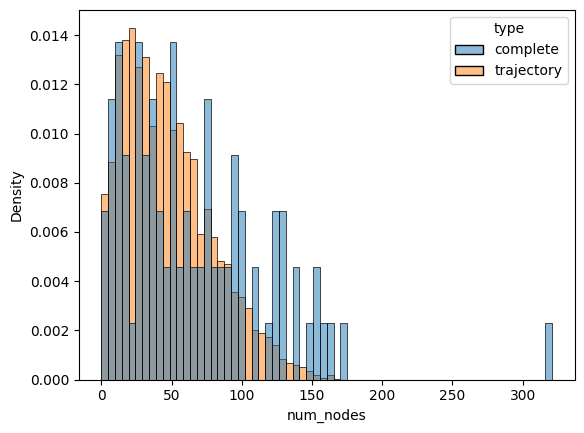

In [5]:
sns.histplot(data=df, x='num_nodes', hue='type', common_norm=False, stat='density')

## Trees or Not

<AxesSubplot: xlabel='is_tree', ylabel='Density'>

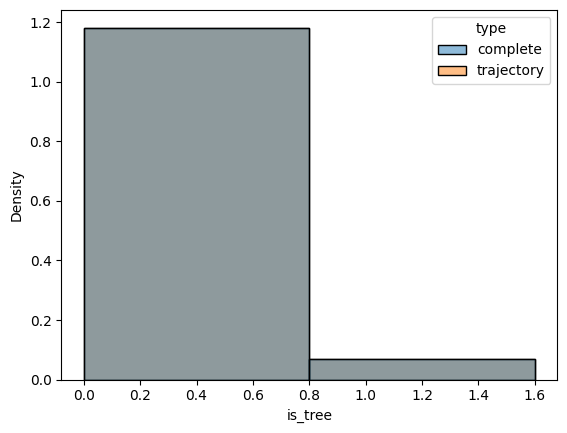

In [6]:
sns.histplot(x='is_tree', data=df, hue='type', binwidth=0.8, common_norm=False, stat='density')

## Connected or Not

<AxesSubplot: xlabel='is_disconnected', ylabel='Density'>

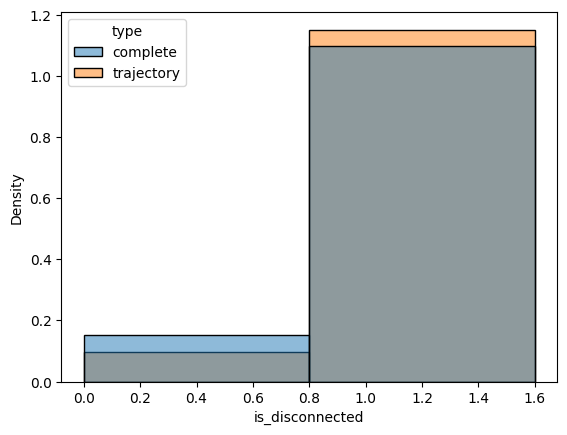

In [7]:
sns.histplot(x='is_disconnected', data=df, hue='type', binwidth=0.8, common_norm=False, stat='density')

## Treewidth Upper-Bound

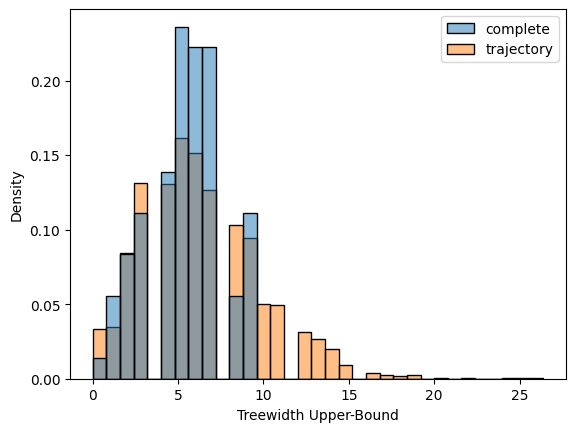

In [11]:
sns_plot = sns.histplot(x='treewidth_ub', data=df, hue='type', binwidth=0.8, common_norm=False, stat='density')
sns_plot.set(xlabel='Treewidth Upper-Bound')
sns_plot.legend_.set_title('')

In [12]:
# Saving figure
fig = sns_plot.get_figure()
fig.savefig("runs/object_tw.png")

## Graph Degree

<AxesSubplot: xlabel='degree', ylabel='Density'>

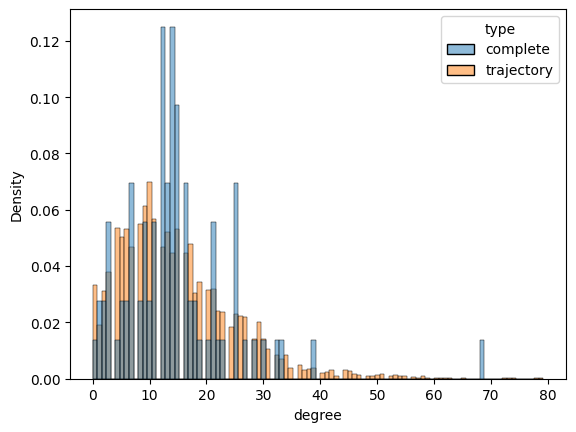

In [11]:
sns.histplot(x='degree', data=df, hue='type', binwidth=0.8, common_norm=False, stat='density')

## Planarity

<AxesSubplot: xlabel='is_planar', ylabel='Density'>

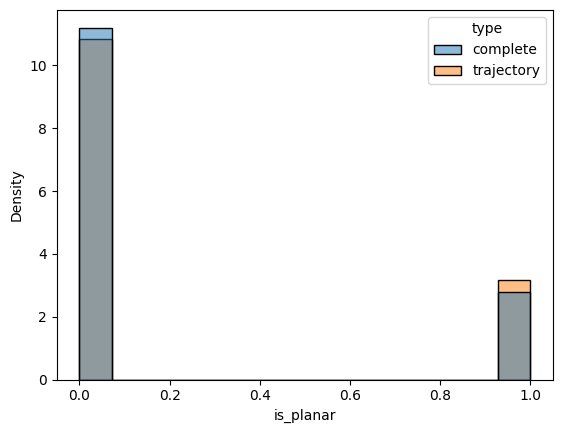

In [12]:
sns.histplot(x='is_planar', data=df, hue='type', common_norm=False, stat='density')

# Conclusion




- The dataset does not have any object-to-object edges. 